# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash import dcc, html, Input, Output
import plotly.express as px
from dash.dependencies import Input, Output
import cufflinks as cf
import chart_studio.plotly as py
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-f6fb2468d7d0>:9: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-1-f6fb2468d7d0>:10: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


# Data Loading

In [2]:
df = pd.read_csv('/content/UdemyCoursesDataset.csv')

In [3]:
df


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments
...,...,...,...,...,...,...,...,...,...,...,...
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20T22:15:17Z,Web Development
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26T20:04:21Z,Musical Instruments
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,6.5 hours,2015-11-11T18:55:45Z,Web Development
3680,1225194,Zoho Books Gestion Financière d'Entreprise pas...,False,Free,229,0,33,All Levels,2 hours,2017-05-26T16:45:55Z,Business Finance


# Pre-processing

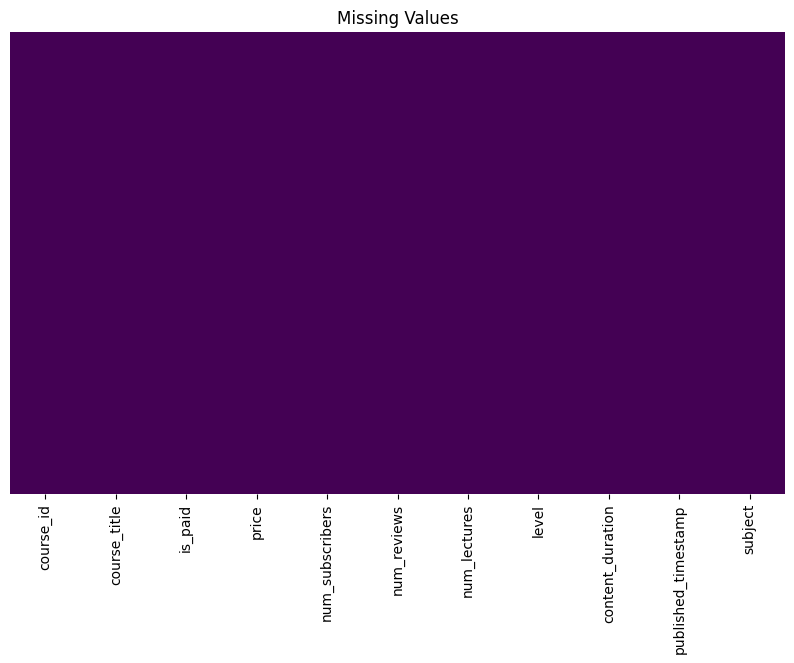

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values")
plt.show()

In [5]:
df.dropna(inplace=True)

# Plot Numerical Distributions

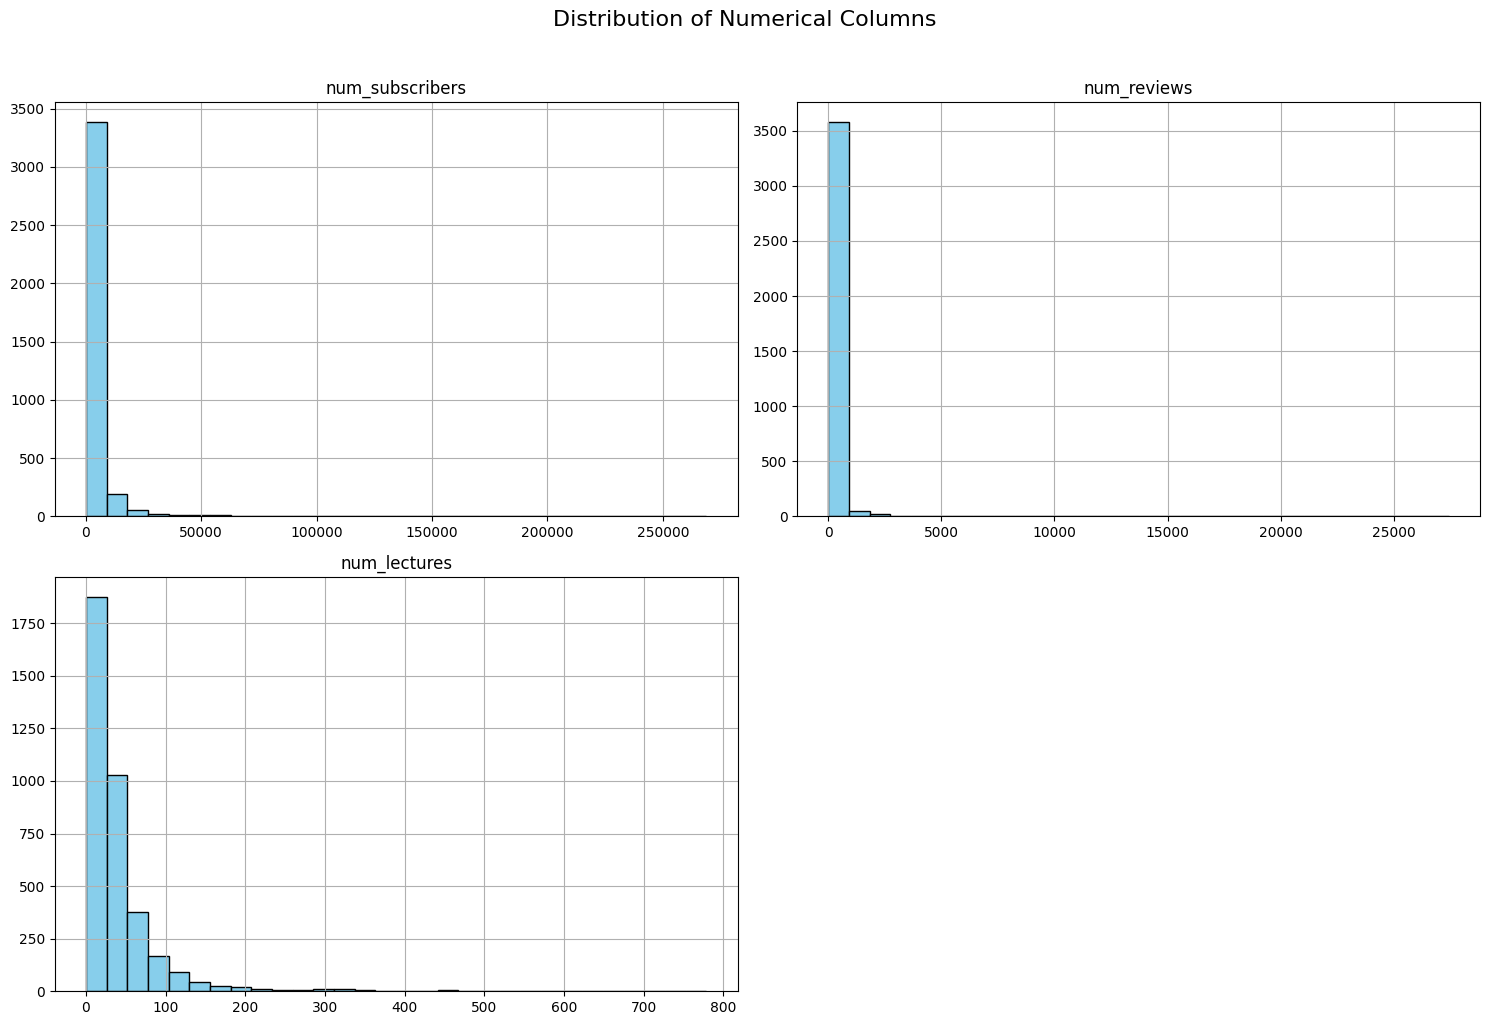

In [6]:
numerical_columns = ["price", "num_subscribers", "num_reviews", "num_lectures", "content_duration"]
df[numerical_columns].hist(bins=30, figsize=(15, 10), color="skyblue", edgecolor="black")
plt.suptitle("Distribution of Numerical Columns", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Plot Categorical **Distributions**

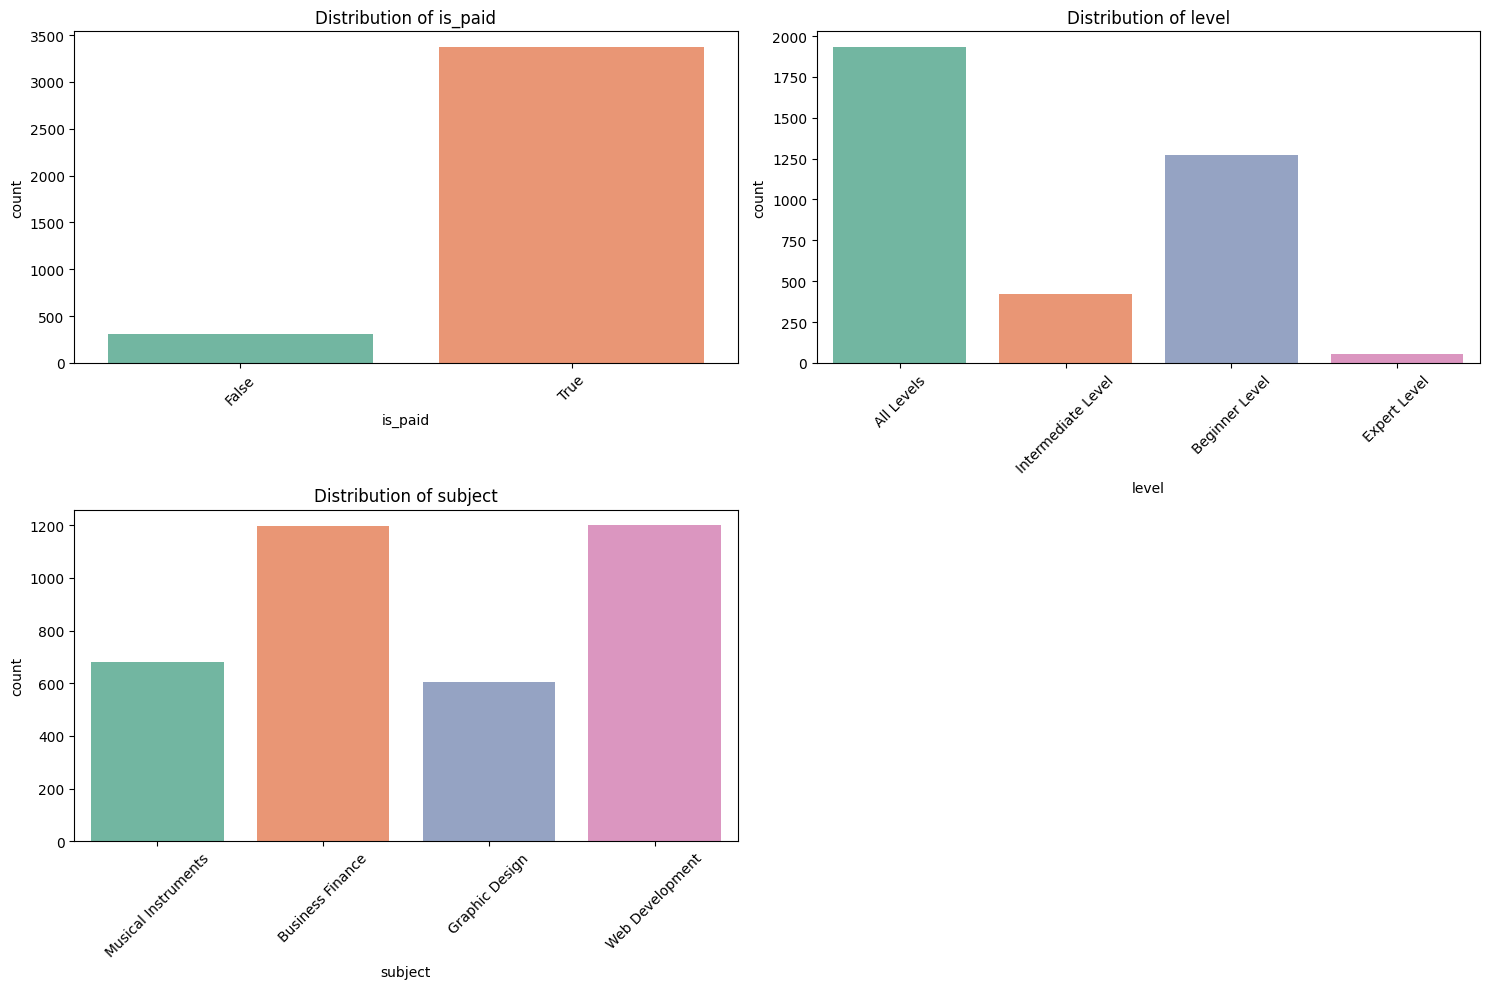

In [7]:
# Plot bar plots for categorical columns
categorical_columns = ["is_paid", "level", "subject"]
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Advanced Visualizations

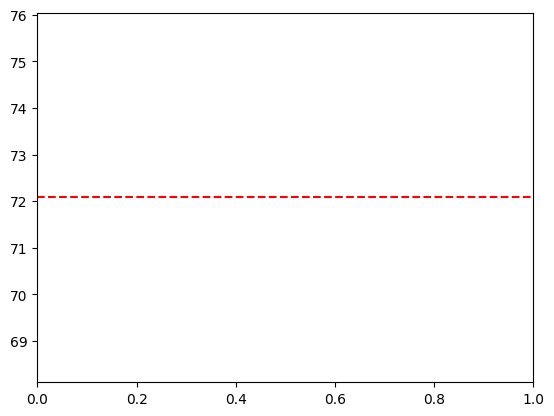

In [8]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

mean_price = df['price'].mean(skipna=True)
plt.axhline(mean_price, color='red', linestyle='--', label='Mean Price')

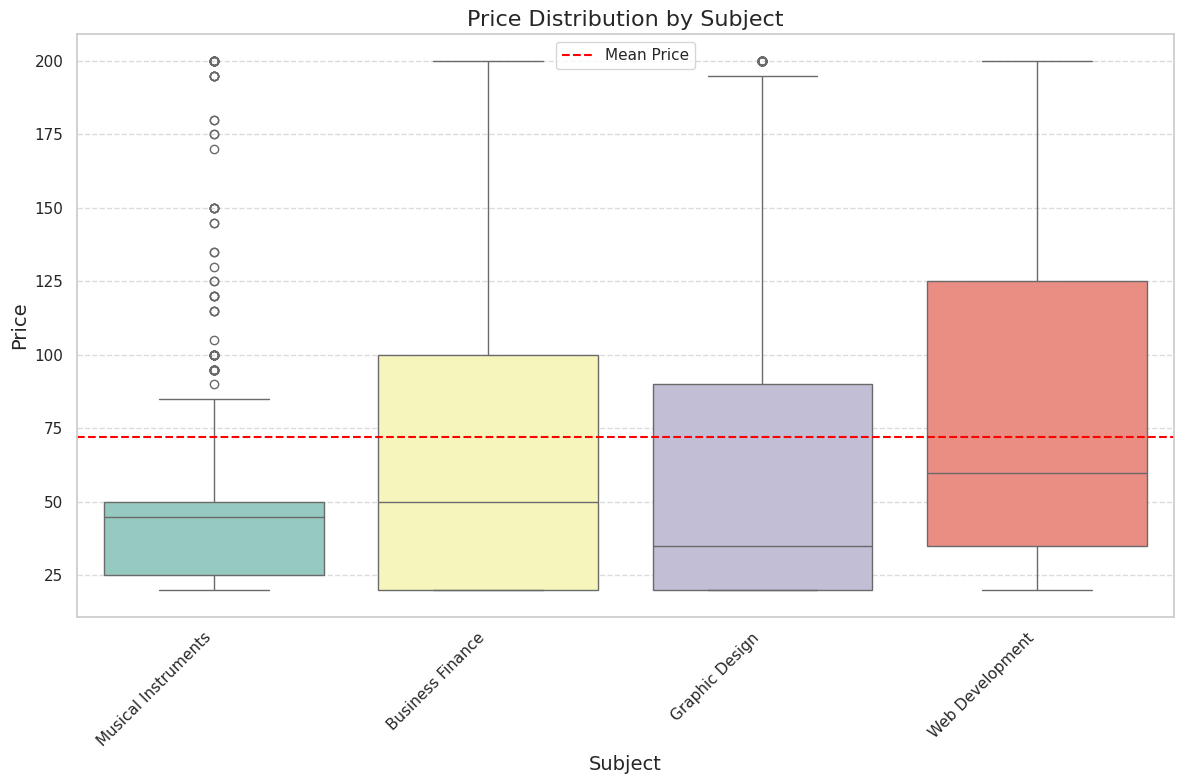

In [9]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="subject", y="price", palette="Set3")

plt.title("Price Distribution by Subject", fontsize=16)
plt.xlabel("Subject", fontsize=14)
plt.ylabel("Price", fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)

mean_price = df['price'].mean()
plt.axhline(mean_price, color='red', linestyle='--', label='Mean Price')

plt.legend()

plt.tight_layout()
plt.show()

In [10]:


def handle_outliers_iqr(df, column, subject):
    Q1 = df[df['subject'] == subject][column].quantile(0.25)
    Q3 = df[df['subject'] == subject][column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df[~((df['subject'] == subject) & ((df[column] < lower_bound) | (df[column] > upper_bound)))]

    return df_filtered

df = handle_outliers_iqr(df, 'price', 'Musical Instruments')
df

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35.0,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75.0,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75.0,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75.0,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75.0,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments
...,...,...,...,...,...,...,...,...,...,...,...
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120.0,1566,29,36,All Levels,4 hours,2015-04-20T22:15:17Z,Web Development
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70.0,1018,12,22,Beginner Level,5 hours,2015-10-26T20:04:21Z,Musical Instruments
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40.0,723,130,37,All Levels,6.5 hours,2015-11-11T18:55:45Z,Web Development
3680,1225194,Zoho Books Gestion Financière d'Entreprise pas...,False,NaN,229,0,33,All Levels,2 hours,2017-05-26T16:45:55Z,Business Finance


In [11]:
df = df.drop_duplicates()
df['price'] = pd.to_numeric(df['price'], errors='coerce')


In [12]:
def convert_duration(duration):
    if 'hour' in duration:
        hours = float(duration.split(' ')[0])
        minutes = float(duration.split(' ')[2]) if 'min' in duration else 0
        return int(hours * 60 + minutes)
    elif 'min' in duration:
        return int(duration.split(' ')[0])
    return 0

df['content_duration'] = df['content_duration'].apply(convert_duration)

In [13]:
fig = px.box(df, x="subject", y="price", color="subject",
             title="Price Distribution by Subject",
             color_discrete_sequence=px.colors.qualitative.Set3)

fig.add_trace(go.Scatter(
    x=df['subject'].unique(),
    y=[mean_price] * len(df['subject'].unique()),
    mode='lines',
    name='Mean Price',
    line=dict(color='red', dash='dash')
))

fig.update_layout(
    xaxis_title="Subject",
    yaxis_title="Price",
    title_font=dict(size=16),
    xaxis_tickangle=-45,
    yaxis=dict(showgrid=True, gridcolor='LightGray'),
    legend=dict(title='Subject')
)

fig.show()

# **EDA**

In [14]:
fig = px.histogram(df, x='price', title='Price Distribution', nbins=30)
fig.show()

fig = px.histogram(df, x='num_subscribers', title='Number of Subscribers Distribution', nbins=30)
fig.show()

fig = px.histogram(df, x='num_reviews', title='Number of Reviews Distribution', nbins=30)
fig.show()

In [15]:
numerical_features = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_features].corr()

fig = px.imshow(correlation_matrix, title='Correlation Matrix', color_continuous_scale='Viridis')
fig.show()

In [16]:
df['price'] = pd.to_numeric(df['price'], errors='coerce').fillna(0)


# Preprocessing
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])
df['year'] = df['published_timestamp'].dt.year
df['log_subscribers'] = np.log1p(df['num_subscribers'])  # For skewed data

# Initialize Dash app
app = dash.Dash(__name__)
server = app.server

# Define dashboard layout
app.layout = html.Div([
    html.H1("Udemy Courses Advanced Analytics Dashboard", style={'textAlign': 'center'}),

    # KPI Cards
    html.Div([
        html.Div([
            html.H3(f"{len(df):,}", style={'color': '#636EFA'}),
            html.P("Total Courses")
        ], className='kpi-card'),

        html.Div([
            html.H3(f"{df['num_subscribers'].sum():,}", style={'color': '#00CC96'}),
            html.P("Total Subscribers")
        ], className='kpi-card'),

        html.Div([
            html.H3(f"${df['price'].median():.2f}", style={'color': '#EF553B'}),
            html.P("Median Price")
        ], className='kpi-card'),
    ], className='kpi-row'),

    # Interactive Controls
    html.Div([
        dcc.Dropdown(
            id='subject-selector',
            options=[{'label': s, 'value': s} for s in df['subject'].unique()],
            value=['Business Finance', 'Web Development'],
            multi=True,
            placeholder="Select Subjects"
        )
    ], style={'width': '50%', 'margin': '20px auto'}),

    # Main Visualizations
    dcc.Graph(id='3d-scatter-plot'),

    html.Div([
        dcc.Graph(id='price-distribution'),
        dcc.Graph(id='subscriber-trend')
    ], className='row'),

    html.Div([
        dcc.Graph(id='correlation-heatmap'),
        dcc.Graph(id='subject-comparison')
    ], className='row'),

    dcc.Graph(id='time-series-analysis')
], style={'padding': '20px'})

# Callbacks for interactivity
@app.callback(
    [Output('3d-scatter-plot', 'figure'),
     Output('price-distribution', 'figure'),
     Output('subscriber-trend', 'figure'),
     Output('correlation-heatmap', 'figure'),
     Output('subject-comparison', 'figure'),
     Output('time-series-analysis', 'figure')],
    [Input('subject-selector', 'value')]
)
def update_plots(selected_subjects):
    filtered_df = df[df['subject'].isin(selected_subjects)]

    # 1. 3D Scatter Plot (Advanced)
    scatter_3d = px.scatter_3d(
        filtered_df,
        x='price',
        y='num_lectures',
        z='log_subscribers',
        color='subject',
        size='num_reviews',
        hover_name='course_title',
        title="3D Relationship: Price vs. Lectures vs. Subscribers (Log Scale)"
    )

    # 2. Violin Plot with Box Plot (Price Distribution)
    price_dist = px.violin(
        filtered_df,
        x='subject',
        y='price',
        box=True,
        points="all",
        title="Price Distribution with Density Estimation"
    )

    # 3. Subscriber Trend Analysis
    trend_fig = px.scatter(
        filtered_df,
        x='content_duration',
        y='num_subscribers',
        color='subject',
        trendline="lowess",
        log_y=True,
        title="Subscriber Growth vs. Course Duration (LOESS Trend)"
    )

    # 4. Advanced Correlation Heatmap
    corr_matrix = filtered_df[['price', 'num_subscribers', 'num_reviews',
                              'num_lectures', 'content_duration']].corr()
    heatmap = px.imshow(
        corr_matrix,
        text_auto=True,
        aspect="auto",
        title="Advanced Correlation Matrix",
        color_continuous_scale='RdBu_r'
    )

    # 5. Radar Chart for Subject Comparison
    agg_df = filtered_df.groupby('subject').agg({
        'price': 'median',
        'num_subscribers': 'mean',
        'num_reviews': 'mean',
        'content_duration': 'median'
    }).reset_index()

    radar = px.line_polar(
        agg_df,
        r='num_subscribers',
        theta='subject',
        line_close=True,
        title="Subject Performance Radar Chart"
    )

    # 6. Time Series Analysis
    time_series = px.area(
        filtered_df.groupby(['year', 'subject']).size().reset_index(name='count'),
        x='year',
        y='count',
        color='subject',
        title="Course Publication Growth Over Time"
    )

    return scatter_3d, price_dist, trend_fig, heatmap, radar, time_series

# Add custom CSS
app.css.append_css({
    'external_url': '''
    .kpi-card {
        background: #f9f9f9;
        border-radius: 5px;
        padding: 20px;
        margin: 10px;
        text-align: center;
        box-shadow: 0 4px 6px rgba(0,0,0,0.1);
        flex: 1;
    }
    .kpi-row {
        display: flex;
        justify-content: space-around;
        margin: 20px 0;
    }
    .row {
        display: flex;
        justify-content: space-between;
        margin: 20px 0;
    }
    '''
})

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>